<a href="https://colab.research.google.com/github/kotech1/computervision/blob/master/appendix/12_norm_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras에서의 gradient 계산

입력과 출력이 동일한 (`outputs = inputs`) 간단한 모델을 가정합니다.  
이 모델의 추론 결과는 다음과 같습니다. (`y_pred = model.predict(x) = x`)  
$$
\hat y = x
$$
Ground Truth(GT)가 y라고 할 때 mse 손실 함수는 다음과 같습니다.  
$$
L(\hat y, y) = {1\over N}\sum_j(\hat y_j - y_j)^2 
$$  
손실 함수를 x에 대해 미분한 graident는 다음과 같습니다.  
$$
{\partial L \over \partial x_i} = {1\over N}\sum_j{\partial (\hat y_j-y_j)^2\over \partial x_i}
= {1\over N}{\partial (x_i-y_i)^2\over \partial x_i} = 2(x_i-y_i)/N
$$
이것을 keras 코드로 구현해 봅시다.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# data는 총 3개(N=3)
x = tf.Variable([[1.], [2.], [3.]])
y_true = tf.Variable([[0.9], [1.9], [2.9]])
y_pred = x
with tf.GradientTape() as tape:
    loss = tf.reduce_mean((y_pred - y_true)**2)
grads = tape.gradient(loss, x)
print(grads.numpy())

[[0.06666669]
 [0.06666669]
 [0.0666666 ]]


손으로 직접 계산과 비교:  
$$
{\partial L \over \partial x_0} = 2(1.0 - 0.9)/3 = {1\over15}\\
{\partial L \over \partial x_1} = 2(2.0 - 1.9)/3 = {1\over15}\\
{\partial L \over \partial x_2} = 2(3.0 - 2.9)/3 = {1\over15}\\
$$

# Keras로 정규분표에서 샘플링 하기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# 표준 정규분포 N(0,1) 샘플링 데이터 만들기
epsilon = tf.keras.backend.random_normal(shape=(500, 2))
mu = (6.0, 3.0)
stddev = (2.0, 1.0)
# 직접 평균과 표준편차를 지정하여 샘플링 데이터 만들기 N(mu, stddev)
std = tf.keras.backend.random_normal(shape=(500, 2), mean=mu, stddev=stddev)
# epsilon N(0,1)을 이용하여 N(mu, stdev) 샘플링 데이터 만들기
std2 = mu + stddev*epsilon

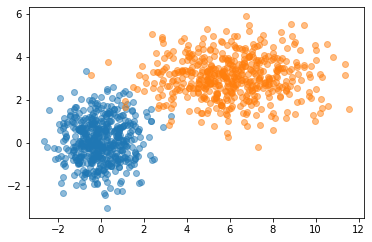

In [2]:
fig = plt.figure()
ax = plt.gca() 
ax.set_aspect('equal')
plt.scatter(epsilon.numpy()[:, 0], epsilon.numpy()[:, 1], alpha=0.5)
plt.scatter(std.numpy()[:, 0], std.numpy()[:, 1], alpha=0.5)
plt.show()

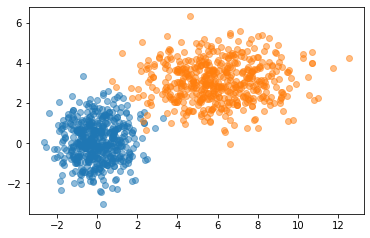

In [3]:
fig = plt.figure()
ax = plt.gca() 
ax.set_aspect('equal')
plt.scatter(epsilon.numpy()[:, 0], epsilon.numpy()[:, 1], alpha=0.5)
plt.scatter(std2.numpy()[:, 0], std2.numpy()[:, 1], alpha=0.5)
plt.show()